# Q1 a

In [1]:
#importing useful libraries
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Creating a graph
G = nx.DiGraph()
#Reading the graph file

try:#trying to open the network file
    with open('rogetnetwork.txt', 'r') as file:
        #Reading lines of the file
        for line in file:
            #getting all nodes in a line
            nodes = line.strip().split()
            #First node of every line is a sourse node
            source_node = int(nodes[0])
            #Getting neighbors of a sourse node and adding to the graph
            for target_node in map(int, nodes[1:]):
                G.add_edge(source_node, target_node)
except:
    print("Error: File not found!")

In [3]:
#finding the weekly connected components of the graph
weakly_connected = list(nx.weakly_connected_components(G))
#finding the greatest weekly connected components of the graph based on the number of nodes
greatest_component = max(weakly_connected, key=len)

In [4]:
#finding all remaining components of the graph
all_except_greatest = [component for component in weakly_connected if component != greatest_component]
#finding nodes of each of the remaining components
nodes_per_component = [list(component) for component in all_except_greatest]

nodes=[]
#getting all the nodes of all weekly connected components except greates component
for i,component in enumerate(nodes_per_component):
    nodes_in_other_components = [node for node in component if node in G]
    nodes+=nodes_in_other_components 
    
#creating a dictionary of the labels of the nodes
word_dict = {}
with open('rogetlabels.txt', 'r') as file:
    for line in file:
        # Split the line into key and value
        key, value = line.strip().split(' ', 1)
        # Convert key to integer
        key = int(key)
        # Remove the quotation marks from the value
        value = value.strip('"')
        # Add key-value pair to the dictionary
        word_dict[key] = value
        
print("Except for the greatest component, list all nodes of the other weakly connected components of the network\n")        
for i in nodes:
    print("node: ",i,"label: ",word_dict[i])

Except for the greatest component, list all nodes of the other weakly connected components of the network

node:  96 label:  triplication
node:  97 label:  trisection
node:  99 label:  quadruplication
node:  100 label:  quadrisection
node:  101 label:  five or more
node:  102 label:  quinquesection or finer
node:  245 label:  dextrality
node:  246 label:  sinistrality
node:  406 label:  odour
node:  407 label:  inodorousness
node:  443 label:  redness
node:  444 label:  greenness
node:  445 label:  yellowness
node:  446 label:  purpleness
node:  448 label:  orangeness
node:  447 label:  blueness


# Explanation

The given network is based on the Roget's Thesaurus, created by Dr. Peter Mark Roget. 

The provided list of nodes appears to be a comprehensive compilation of concepts found in Roget's Thesaurus, 1879. This thesaurus, originally compiled by Peter Mark Roget, categorizes words and phrases based on their meanings and relationships with other words. Each node in the list represents a specific concept or term, and the organization of these nodes reflects the hierarchical structure of the thesaurus. It is a valuable tool for finding words with similar meanings.

Upon closer examination, it's evident that the nodes are arranged systematically, with pairs of concepts often placed side by side to highlight connections (contrasts or similarities). 

The largest component has all nodes that are synonyms or antonyms but related to one another, that's why they are connected. All others are isolated from the gaint component, but connected with each other of the same nature. Despite the thoroughness of the list, there are some nodes that remain disconnected from the main graph

And this make sense. For example, terms like "existence" and "inexistence" and "substantiality" and "unsubstantiality" are paired together, emphasizing the nature of these concepts. The unconnected nodes, such as "dextrality," "sinistrality," "odour," and various colors,indicate the existence of peripheral concepts that are not fully integrated into the main structure of the thesaurus.


# Q 1b

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

#finding the strongly connected components of the graph
strongly_connected_components = nx.strongly_connected_components(G)
#finding the greatest strongly connected components of the graph
greatest_strongly_connected_component = max(strongly_connected_components, key=len)
#creating the graph of the greatest strongly connected components
G=G.subgraph(greatest_strongly_connected_component)



in_degrees = dict(G.in_degree())
out_degrees = dict(G.out_degree())
katz_centrality = nx.katz_centrality_numpy(G)
katz_centrality1 = nx.katz_centrality(G)
betweenness_centrality = nx.edge_betweenness_centrality(G)
eccentricity = nx.eccentricity(G)

In [ ]:
# ploting centrality distributions
plt.figure(figsize=(10, 15))
plt.suptitle('Centrality Distributions')

#In-Degree Centrality Distribution
plt.subplot(3, 2, 1)
plt.hist(in_degrees.values(), bins=20, color='blue', edgecolor='black', linewidth=2)
plt.title('In-Degree Distribution')
plt.xlabel('In-Degree')
plt.ylabel('Frequency')

#Out-Degree Centrality Distribution
plt.subplot(3,2, 2)
plt.hist(out_degrees.values(), bins=20, color='blue', edgecolor='black', linewidth=2)
plt.title('Out-Degree Distribution')
plt.xlabel('Out-Degree')
plt.ylabel('Frequency')

#Katz Centrality Distribution
plt.subplot(3,2, 3)
plt.hist(list(katz_centrality.values()), bins=20, color='blue', edgecolor='black', linewidth=2)
plt.title('Katz Centrality Distribution')
plt.xlabel('Katz Centrality')
plt.ylabel('Frequency')


#Betweenness Centrality Distribution
plt.subplot(3,2, 4)
plt.hist(list(betweenness_centrality.values()), bins=20, color='blue', edgecolor='black', linewidth=2)
plt.title('Edge Betweenness Centrality Distribution')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Frequency')

#Eccentricity Distribution
plt.subplot(3,2, 5)
plt.hist(list(eccentricity.values()), bins=20, color='blue', edgecolor='black', linewidth=2)
plt.title('Eccentricity Distribution')
plt.xlabel('Eccentricity')
plt.ylabel('Frequency')

# adjusting layout and display the plots
plt.tight_layout()
plt.show()


The betweeness cebtrality indicate that most of the nodes have low betweeness. Only few nodes has high values. It means most of the nodes are strongly connected.

# In-degree:

In-degree centrality measures the number of incoming edges to a node, indicating how many other nodes reference it.  High in-degree values indicate that many categories are referenced by other categories, suggesting a hierarchical structure. The high in-degree values suggest that many categories serve as references or cross-references for other categories. This interconnection reflects the network of semantic relationships within the thesaurus, where concepts are linked association.

# Out-degree:

A high out-degree for nodes indicates that each category in the thesaurus is associated with numerous other categories. This suggests that each concept is linked to a wide range of related words and ideas, reflecting the richness and depth of semantic associations within the thesaurus. The high out-degree values indicate extensive cross-referencing within the thesaurus.The high out-degree values imply that each category in the thesaurus contains a diverse set of synonyms and antonyms. Users can explore multiple alternative words or phrases associated with a given concept, providing a comprehensive view of linguistic variations and nuances.

# Katz Centrality:

Katz centrality measures the influence of a node based on its immediate neighbors and their neighbors, with diminishing importance for nodes farther away. Nodes with high Katz centrality are influential nodes with many connections to other influential nodes, indicating their importance in the network's overall structure. Few nodes have high Katz centrality, this leads to the conclusion that these nodes serve as central hubs or pivotal points within the network, playing a critical role in connecting different components. hese nodes may act as bridges between different parts of the network. For the given network we can say it has a single gaint component that is well connected. There are very few comonents that are at the peripheral of the network. Networks with nodes of high Katz centrality may exhibit greater resilience to random failures or attacks. Since these nodes are highly connected and influential, their removal could disrupt the network's structure and functionality significantly.

# Link Betweenness:

Link betweenness measures the number of shortest paths between pairs of nodes that pass through a particular link. Links with high betweenness are critical for connecting different parts of the network and facilitating communication between nodes. Links with high betweenness are often bridges between different clusters or communities within the network. By looking at the graph we can infer that there are very small number of nodes with high values of link betweeness and most of the nodes has low values of link betweeness. We can say graph is well connected and there are few nodes that have to travel large number of edges to reach other nodes.

# Eccentricity:

Eccentricity measures the maximum distance from a node to all other nodes in the network. Nodes with low eccentricity are central nodes that are close to many other nodes and can quickly disseminate information or influence throughout the network. From the graph of eccentricity,most of the nodes have eccentricity values ranging from 9-11. On average a node has to travel 10 nodes to reach any other node. There are very small number of nodes with eccentricity of 7. These nodes are most important nodes of the network. There are negligible nodes with the value 14 of eccentricity, these nodes are far away from the rest of the nodes. On average eccentricity measure indicate that the network is well connected.

# Q 1c

In [6]:
# Find nodes with the highest centrality values
max_in_degree_node = max(in_degrees, key=in_degrees.get)
max_out_degree_node = max(out_degrees, key=out_degrees.get)
max_katz_centrality_node = max(katz_centrality, key=katz_centrality.get)
max_edge_betweenness_edge = max(betweenness_centrality, key=betweenness_centrality.get)
max_eccentricity_node = max(eccentricity, key=eccentricity.get)

print("Node with the highest in-degree centrality:", max_in_degree_node,"Label: ",word_dict[max_in_degree_node])
print("Node with the highest out-degree centrality:", max_out_degree_node,"Label: ",word_dict[max_out_degree_node])
print("Node with the highest Katz centrality:", max_katz_centrality_node,"Label: ",word_dict[max_katz_centrality_node])
print("Edge with the highest edge betweenness centrality:","Label: ", max_edge_betweenness_edge)
print("Node with the highest eccentricity:","Label: ", max_eccentricity_node,word_dict[max_eccentricity_node])


Node with the highest in-degree centrality: 557 Label:  deception
Node with the highest out-degree centrality: 664 Label:  badness
Node with the highest Katz centrality: 557 Label:  deception
Edge with the highest edge betweenness centrality: Label:  (432, 562)
Node with the highest eccentricity: Label:  399 insipidity


In [7]:
# Find incoming neighbors (predecessors) of max_in_degree_node
incoming_neighbors = list(G.predecessors(max_in_degree_node))

# Find outgoing neighbors (successors) of max_in_degree_node
outgoing_neighbors = list(G.successors(max_in_degree_node))

print("Node with highest In-degree:",word_dict[max_in_degree_node])

print("\nIncomping Neighbors")
for n in incoming_neighbors:
    print(n, word_dict[n])
print("\nOutgoing Neighbors")
for n in outgoing_neighbors:
    print(n, word_dict[n])

Node with highest In-degree: deception

Incomping Neighbors
23 copy
151 revolution
498 credulity
507 error
540 concealment
542 ambush
550 misteaching
555 veracity
556 falsehood
558 untruth
559 dupe
560 deceiver
629 motive
632 plea
641 plan
680 danger
682 pitfall
713 skill
717 cunning
808 stealing
960 improbity
1014 sorcery

Outgoing Neighbors
20 imitation
23 copy
432 luminary
452 dimsightedness
507 error
542 ambush
550 misteaching
556 falsehood
558 untruth
560 deceiver
629 motive
717 cunning
808 stealing
960 improbity
1014 sorcery


In [8]:
# Find incoming neighbors (predecessors) of max_out_degree_node
incoming_neighbors = list(G.predecessors(max_out_degree_node))

# Find outgoing neighbors (successors) of max_out_degree_node
outgoing_neighbors = list(G.successors(max_out_degree_node))

print("Node with highest Out-degree:",word_dict[max_out_degree_node])
print("\nIncoming Neighbors")
for n in incoming_neighbors:
    print(n,word_dict[n])
print("\nOutgoing Neighbors")
for n in outgoing_neighbors:
    print(n,word_dict[n])

Node with highest Out-degree: badness

Incoming Neighbors
634 evil
663 goodness
666 imperfection
674 deterioration
678 bane
847 painfulness
850 regret
952 disapprobation

Outgoing Neighbors
167 destruction
369 killing
634 evil
658 unimportance
660 inutility
662 inexpedience
663 goodness
666 imperfection
670 disease
672 insalubrity
674 deterioration
678 bane
694 misuse
714 unskilfulness
847 painfulness
876 hopelessness
925 malevolence
931 evil doer
952 disapprobation
965 vice
967 guilt
993 punishment


In [9]:
# Find incoming neighbors (predecessors) of max_katz_centrality_node
incoming_neighbors = list(G.predecessors(max_katz_centrality_node))

# Find outgoing neighbors (successors) of max_katz_centrality_node
outgoing_neighbors = list(G.successors(max_katz_centrality_node))

print("Node with highest Katz centrality:",word_dict[max_katz_centrality_node])
print("\nIncoming Neighbors")
for n in incoming_neighbors:
    print(n,word_dict[n])
print("\nOutgoing Neighbors")
for n in outgoing_neighbors:
    print(n,word_dict[n])

Node with highest Katz centrality: deception

Incoming Neighbors
23 copy
151 revolution
498 credulity
507 error
540 concealment
542 ambush
550 misteaching
555 veracity
556 falsehood
558 untruth
559 dupe
560 deceiver
629 motive
632 plea
641 plan
680 danger
682 pitfall
713 skill
717 cunning
808 stealing
960 improbity
1014 sorcery

Outgoing Neighbors
20 imitation
23 copy
432 luminary
452 dimsightedness
507 error
542 ambush
550 misteaching
556 falsehood
558 untruth
560 deceiver
629 motive
717 cunning
808 stealing
960 improbity
1014 sorcery


In [10]:
# Find incoming neighbors (predecessors) of max_eccentricity_node
incoming_neighbors = list(G.predecessors(max_eccentricity_node))

# Find outgoing neighbors (successors) of max_eccentricity_node
outgoing_neighbors = list(G.successors(max_eccentricity_node))

print("Node with highest Out-degree:",word_dict[max_eccentricity_node])
print("\nIncoming Neighbors")
for n in incoming_neighbors:
    print(n,word_dict[n])
print("\nOutgoing Neighbors")
for n in outgoing_neighbors:
    print(n,word_dict[n])

Node with highest Out-degree: insipidity

Incoming Neighbors
398 taste
883 indifference

Outgoing Neighbors
398 taste


# Explanation

Centrality measures indicate the importance or prominence of a node within a network based on its connections and interactions with other nodes. The attribution of centrality to these elements aligns with the nature of the network, where nodes closely related to central node i.e., node with highest centrality, play prominent roles in understanding the various aspects and implications of word repreesentd by that node within thesaurus.

For example "deception" is the central node with "copy", "revolution", "credulity", "error", "concealment", "ambush", "misteaching", "veracity", "falsehood", "untruth", "dupe", "deceiver", "motive", "plea", "plan", "danger", "pitfall", "skill", "cunning", "stealing", "improbity", "sorcery" as incoming neighbors while outgoing neighbors are "imitation","copy","luminary", "dimsightedness", "error", "ambush", "misteaching", "falsehood", "untruth", "deceiver", "motive", "cunnig", "stealing","improbity","sorcery". So, "deception" is closely linked to these terms due to their shared themes of dishonesty, manipulation, misleading information, and the exploitation of trust or vulnerabilities.

# Q2a

In [11]:
import networkx as nx
import numpy as np
seed=230418075

def calculate_parameters(N, avg_degree):
    # G(N, L) model
    L = int(avg_degree * N / 2)

    # G(N, p) model
    p = avg_degree / (N - 1)

    # Barabasi-Albert (BA) model
    m = int(avg_degree / 2)

    return L, p, m

# Given parameters
N = 100  # Number of nodes
avg_degree = 6  # Average degree

# Calculate remaining parameters
L, p, m = calculate_parameters(N, avg_degree)

# Create graphs for each model
G_np = nx.erdos_renyi_graph(N, p,seed)
G_nl = nx.gnm_random_graph(N, L,seed)
G_ba = nx.barabasi_albert_graph(N, m,seed)

# Print basic information about the graphs
print("Erdos-Renyi graph (G(N, p)):")
print("Number of nodes:", G_np.number_of_nodes())
print("Number of edges:", G_np.number_of_edges())
print("Average degree:", round(np.mean(list(dict(G_np.degree()).values()))))

print("\nErdos-Renyi graph (G(N, L)):")
print("Number of nodes:", G_nl.number_of_nodes())
print("Number of edges:", G_nl.number_of_edges())
print("Average degree:", np.mean(list(dict(G_nl.degree()).values())))

print("\nBarabasi-Albert graph:")
print("Number of nodes:", G_ba.number_of_nodes())
print("Number of edges:", G_ba.number_of_edges())
print("Average degree:", round(np.mean(list(dict(G_ba.degree()).values()))))


Erdos-Renyi graph (G(N, p)):
Number of nodes: 100
Number of edges: 296
Average degree: 6

Erdos-Renyi graph (G(N, L)):
Number of nodes: 100
Number of edges: 300
Average degree: 6.0

Barabasi-Albert graph:
Number of nodes: 100
Number of edges: 291
Average degree: 6


# Q2b

In [41]:
import networkx as nx
import numpy as np

# Fixed parameters
average_degree = 6
nodes_list = [50,100, 150, 200, 250,300,350,400,450,500]
seed=230418075



shortest_path_GNL=[]
shortest_path_GNP=[]
shortest_path_BA=[]
    
clustering_GNL=[]
clustering_GNP=[]
clustering_BA=[]
    
for N in nodes_list:
    # Calculate parameters
    L = (average_degree * N) / 2
    p = average_degree / (N - 1)
    m = int(np.floor(average_degree / 2))
        

    # Generating networks
    G_GNL = nx.gnm_random_graph(N, int(L),seed)
    G_GNP = nx.erdos_renyi_graph(N, p,seed)
    G_BA = nx.barabasi_albert_graph(N, m,seed)
    
    #Checking if a network is not connected and getting its largest components
    
    if(not nx.is_connected(G_GNL)):   
        connected_components = list(nx.connected_components(G_GNL))
        greatest_component = max(connected_components, key=len)
        G_GNL= G_GNL.subgraph(greatest_component).to_undirected()
           
    if(not nx.is_connected(G_GNP)):     
        connected_components = list(nx.connected_components(G_GNP))
        greatest_component= max(connected_components, key=len)
        G_GNP= G_GNP.subgraph(greatest_component).to_undirected()
            
    if(not nx.is_connected(G_BA)):     
        connected_components = list(nx.connected_components(G_BA))
        greatest_component= max(connected_components, key=len)
        G_BA= G_BA.subgraph(greatest_component).to_undirected()
            

    # Calculate metrics
    avg_shortest_path_GNL = nx.average_shortest_path_length(G_GNL)
    shortest_path_GNL.append(avg_shortest_path_GNL)
    
    avg_shortest_path_GNP = nx.average_shortest_path_length(G_GNP)
    shortest_path_GNP.append(avg_shortest_path_GNP)
    
    avg_shortest_path_BA = nx.average_shortest_path_length(G_BA)
    shortest_path_BA.append(avg_shortest_path_BA)
    
    avg_clustering_GNL = nx.average_clustering(G_GNL)
    clustering_GNL.append(avg_clustering_GNL)
    
    avg_clustering_GNP = nx.average_clustering(G_GNP)
    clustering_GNP.append(avg_clustering_GNP)
    
    avg_clustering_BA = nx.average_clustering(G_BA)
    clustering_BA.append(avg_clustering_BA)
    seed+=1

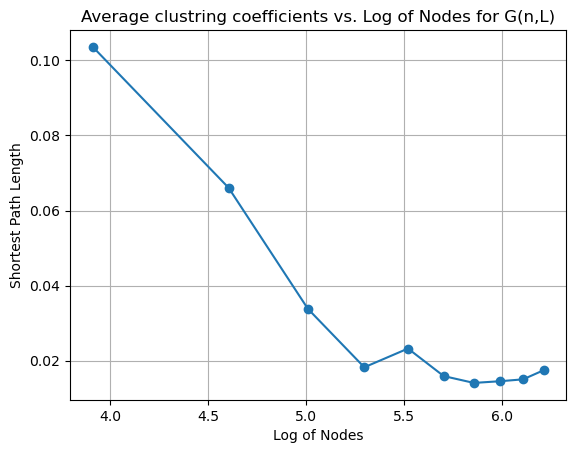

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming shortest_path_GNL and nodes_list are already defined

# Calculate the logarithm of nodes_list
log_nodes_list = np.log(nodes_list)

# Plot shortest_path_GNL against the logarithm of nodes_list
plt.plot(log_nodes_list, clustering_GNL, marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Log of Nodes')
plt.ylabel('Shortest Path Length')
plt.title('Average clustring coefficients vs. Log of Nodes for G(n,L)')

# Display the plot
plt.grid(True)
plt.show()


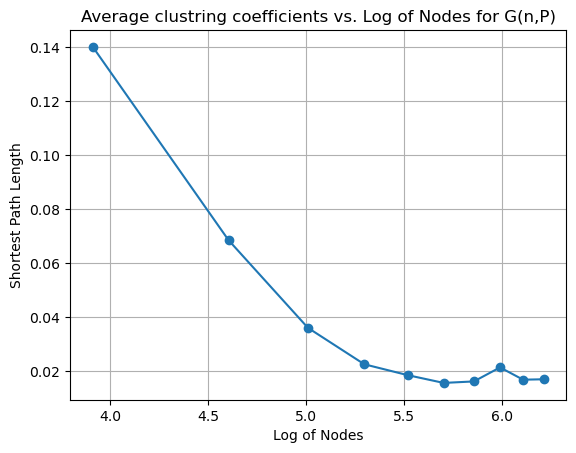

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming shortest_path_GNL and nodes_list are already defined

# Calculate the logarithm of nodes_list
log_nodes_list = np.log(nodes_list)

# Plot shortest_path_GNL against the logarithm of nodes_list
plt.plot(log_nodes_list, clustering_GNP, marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Log of Nodes')
plt.ylabel('Shortest Path Length')
plt.title('Average clustring coefficients vs. Log of Nodes for G(n,P)')

# Display the plot
plt.grid(True)
plt.show()

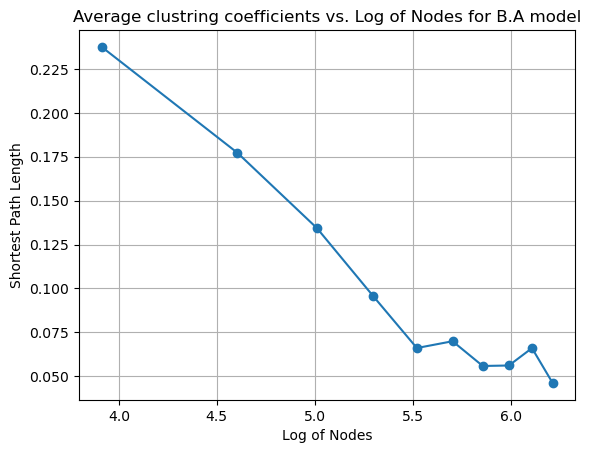

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming shortest_path_GNL and nodes_list are already defined

# Calculate the logarithm of nodes_list
log_nodes_list = np.log(nodes_list)

# Plot shortest_path_GNL against the logarithm of nodes_list
plt.plot(log_nodes_list, clustering_BA, marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Log of Nodes')
plt.ylabel('Shortest Path Length')
plt.title('Average clustring coefficients vs. Log of Nodes for B.A model')

# Display the plot
plt.grid(True)
plt.show()

In [45]:
import math
log_values = [math.log(x) for x in nodes_list]

log_6 = math.log(6)
divided_values = [x / log_6 for x in log_values]

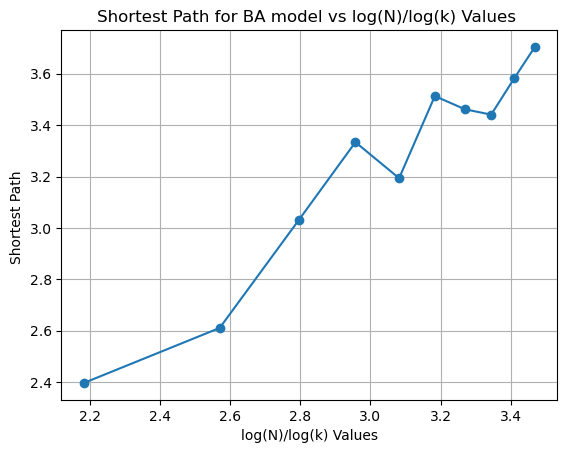

In [46]:
# Plot divided_values against shortest_path_BA
plt.plot( divided_values, shortest_path_GNP,marker='o', linestyle='-')
plt.ylabel('Shortest Path ')
plt.xlabel('log(N)/log(k) Values')
plt.title('Shortest Path for BA model vs log(N)/log(k) Values ')
plt.grid(True)
plt.show()

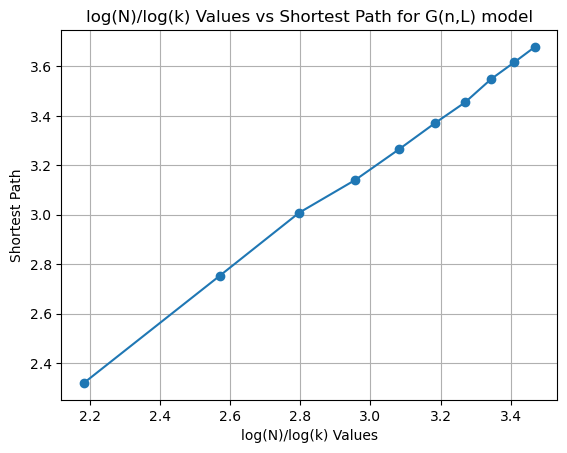

In [47]:
# Plot divided_values against shortest_path_BA
plt.plot(divided_values,shortest_path_GNL,  marker='o', linestyle='-')
plt.ylabel('Shortest Path')
plt.xlabel('log(N)/log(k) Values')
plt.title('log(N)/log(k) Values vs Shortest Path for G(n,L) model')
plt.grid(True)
plt.show()

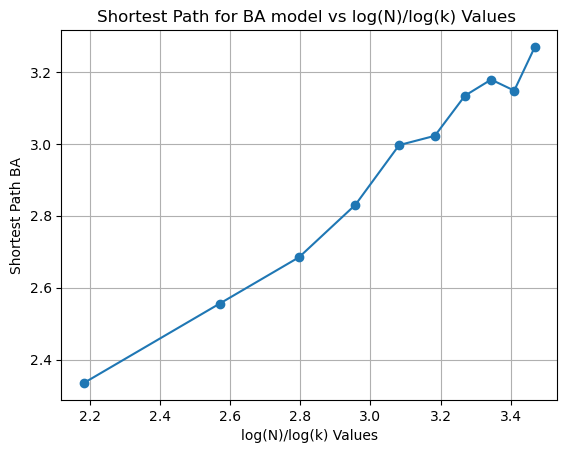

In [48]:
# Plot divided_values against shortest_path_BA
plt.plot(divided_values,shortest_path_BA, marker='o', linestyle='-')
plt.ylabel('Shortest Path BA')
plt.xlabel('log(N)/log(k) Values')
plt.title('Shortest Path for BA model vs log(N)/log(k) Values ')
plt.grid(True)
plt.show()

# Explanation

These graphs refered to [1]. For small number of nodes, real graphs has small clustering coefficients and increase in clustering coefficients with the increase in number of nodes. But these networks are showing the opposite trends. 
The shortest paths should decrease with increase in number of nodes.

# Q 2c

Based on the results, none of the above generated network is a representing closely a real network. Real networks has large clusterings and small world properties and these graphs don;t have any.

# Q2d

# Answer by CgatGPT

A scale-free network is a type of network in which the distribution of node degrees follows a power-law distribution. In other words, there are a few highly connected nodes, known as "hubs," and many nodes with only a few connections. Scale-free networks are characterized by their robustness to random failures but vulnerability to targeted attacks on highly connected nodes.

# Explanation

In a scale-free network, the distribution of node degrees follows a power-law distribution, meaning that there are a few nodes with very high degrees (hubs) and many nodes with low degrees. This scale-free property is one of the key characteristics of many real-world networks, including social networks, the World Wide Web, and biological networks. It's often associated with robustness and resilience to random failures but vulnerability to targeted attacks on highly connected nodes.[1]


# References

[1] Barabasi, A.-L., Network Science.